# Machine Learning using Python

## 📘 Working with Linear Regression
`on California Housing Dataset`


---



### 🔹 Step 1: Importing Libraries and Dataset


---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets



---

**✅Imported essential libraries for data analysis, visualization, and regression modeling.**


---



### 🔹 Step 2: Loading the California Housing Dataset


---



In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

housing_df['HousePrice'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422




---
**✅ Dataset loaded into a Pandas DataFrame with HousePrice as the target variable.
Each row represents a block group in California, with features such as median income, house age, average rooms, etc.**


---





---


### 🔹 Step 3: Exploratory Data Analysis (EDA)


---



In [ ]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
housing_df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
HousePrice,0




---

**✅ Checked summary statistics and confirmed there are no missing values.**


---



### 🔹 Step 4: Pairplot Visualization


---



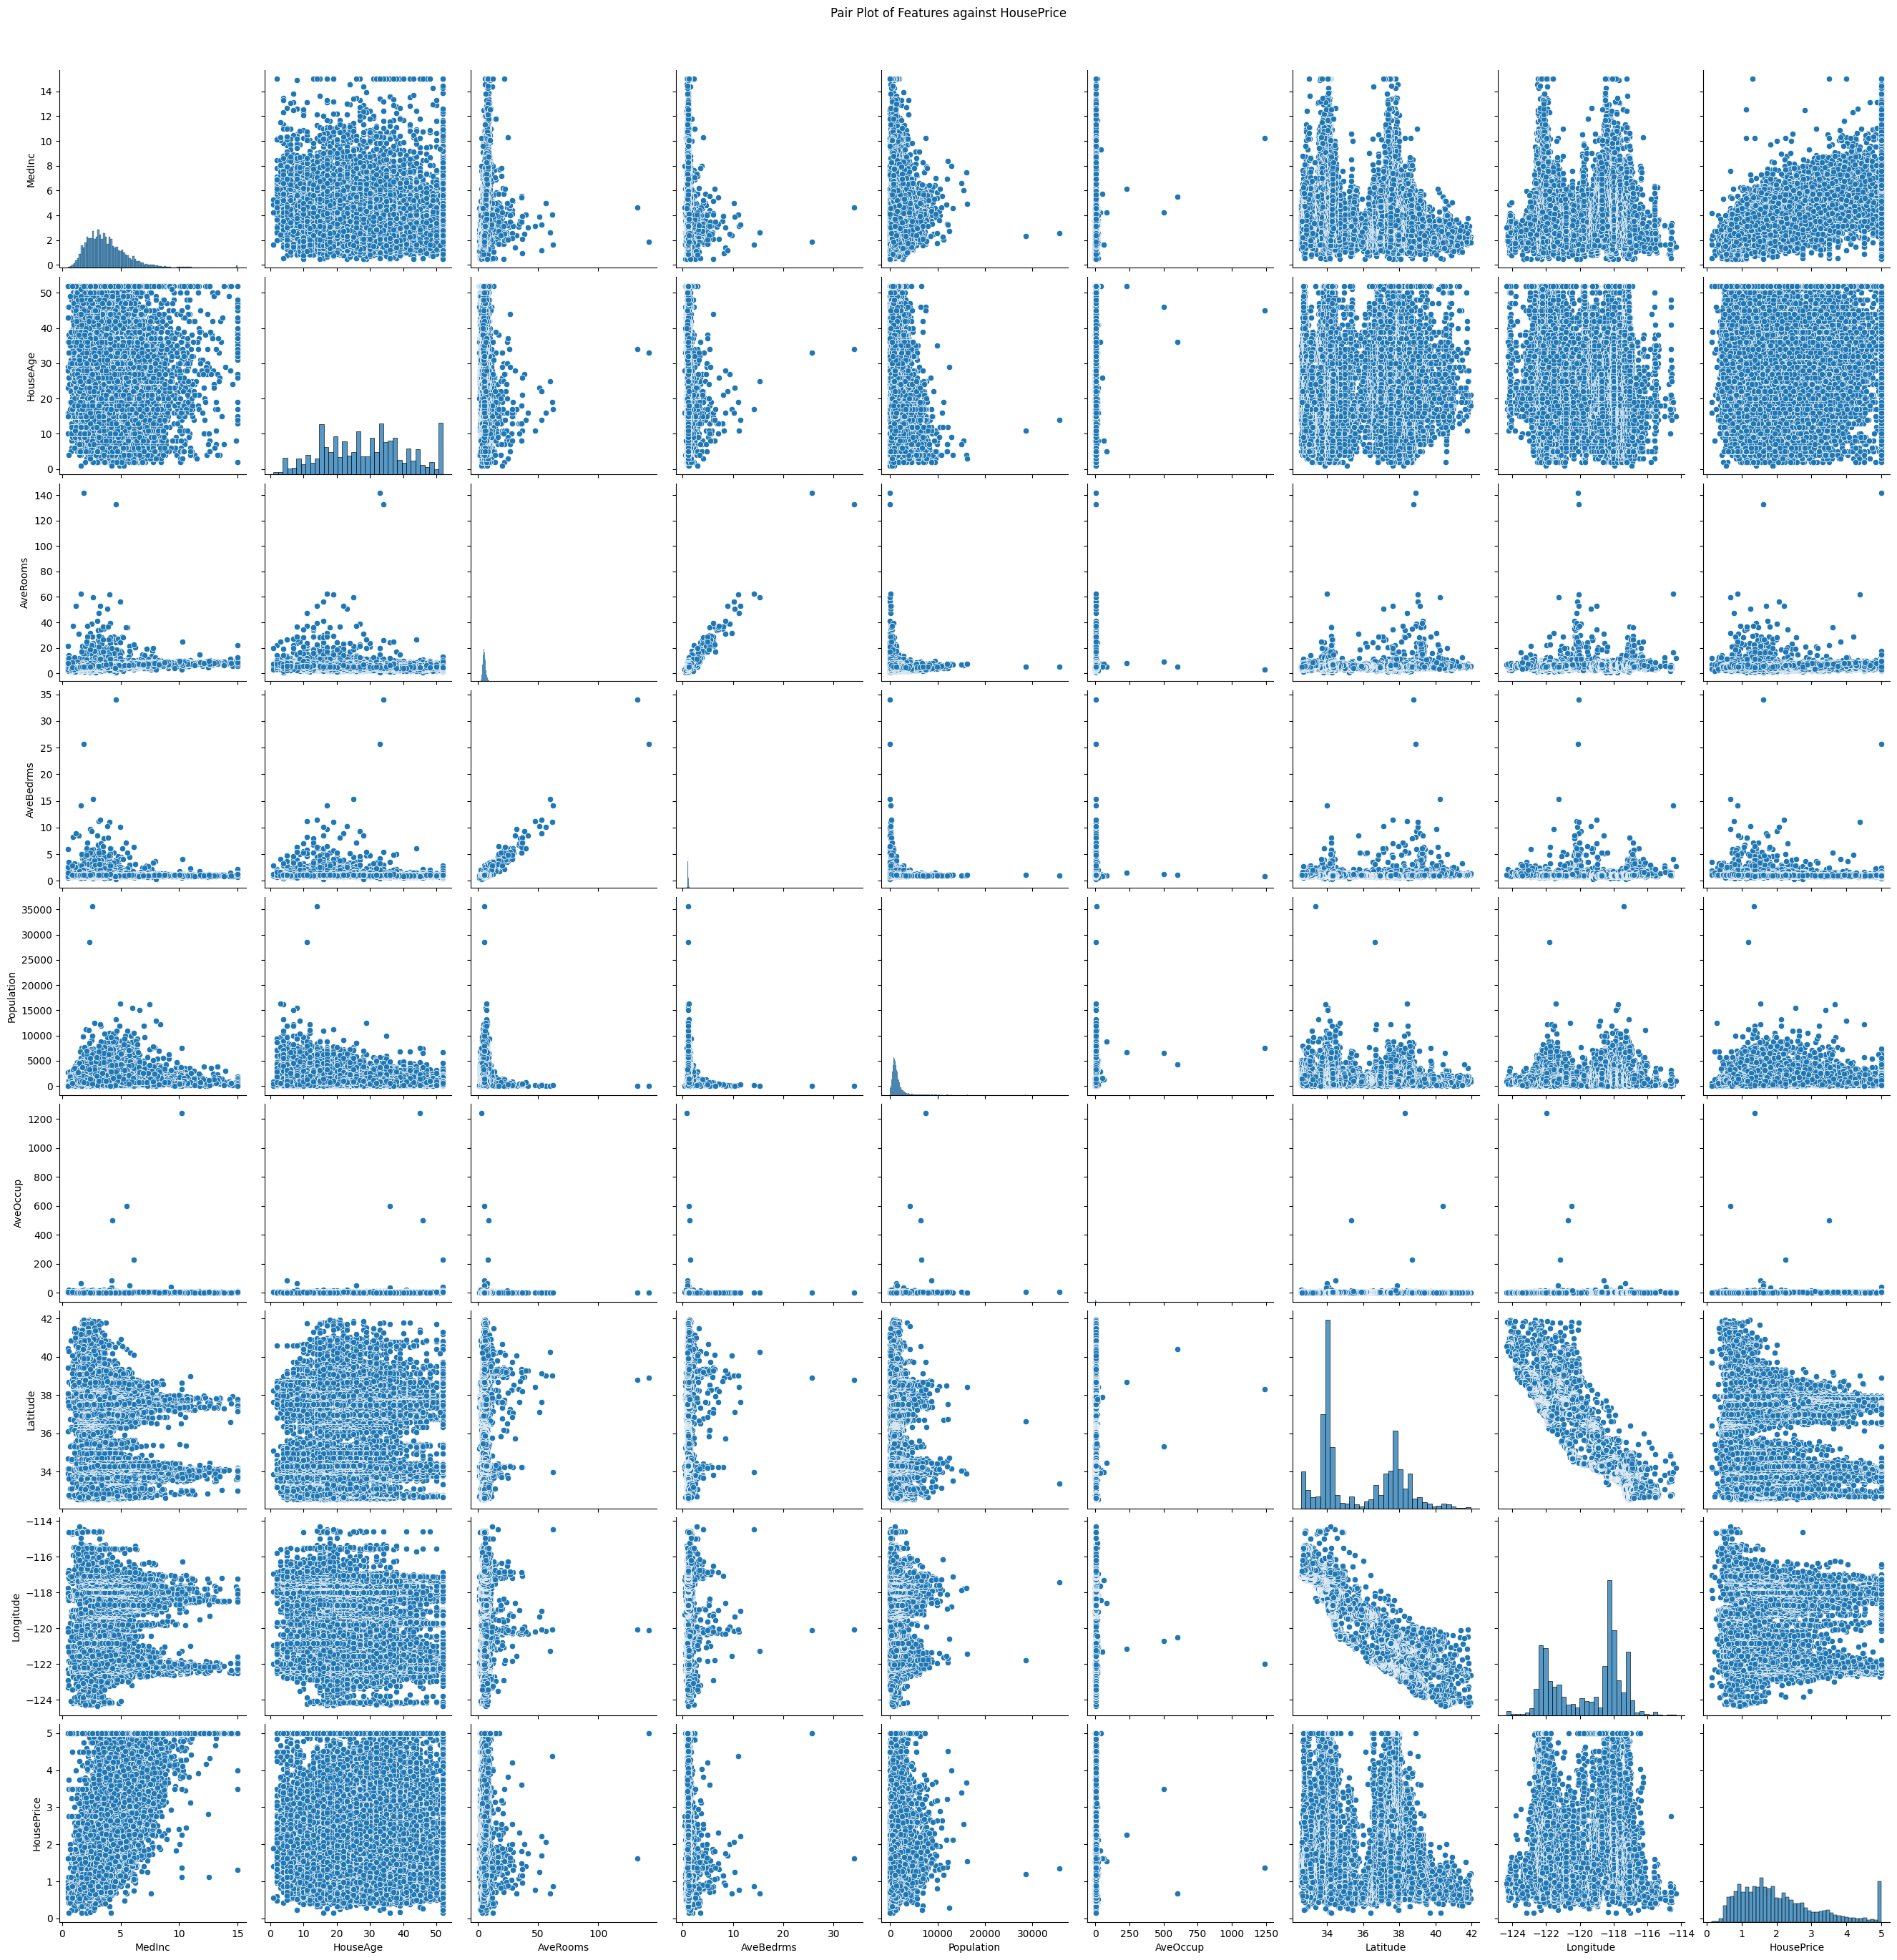

In [ ]:
sns.pairplot(housing_df, height=3)
plt.suptitle('Pair Plot of Features against HousePrice', y=1.02)
plt.show()



---

**📊 Pairplot shows relationships between features and HousePrice.
We can see MedInc (Median Income) has a strong positive correlation with HousePrice.**


---



### 🔹 Step 5: Geographical Visualization


---



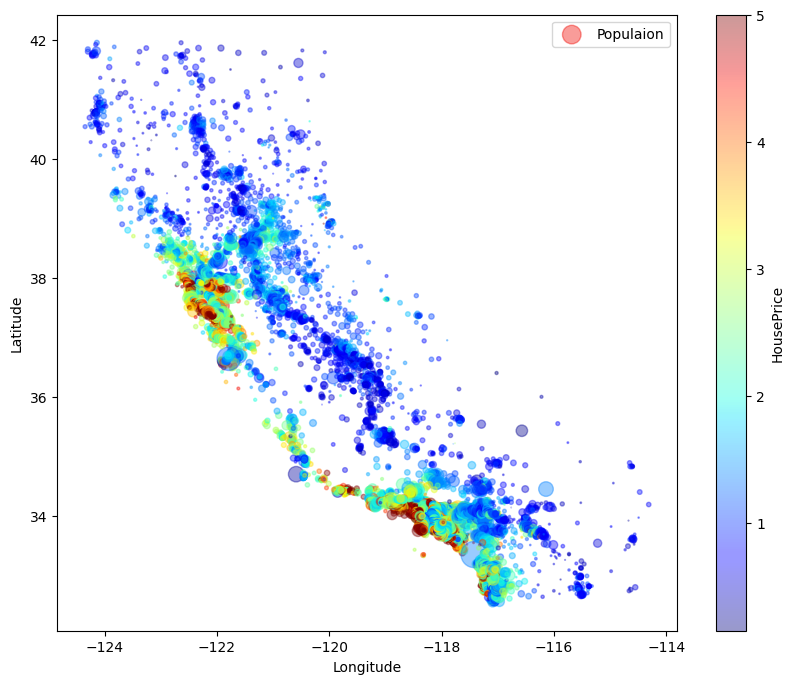

In [ ]:
housing_df.plot(
    kind='scatter',
    x='Longitude',
    y='Latitude',
    alpha=0.4,
    s=housing_df['Population']/100,
    label='Populaion',
    c="HousePrice",
    cmap="jet",
    colorbar=True,
    figsize=(10,8)
)
plt.show()



---
**📍 Scatter plot of California’s map.

* Each point = a block group

* Color = house price

* Size = population

We observe higher prices near coastal regions.**


---




### 🔹 Step 6: Correlation Analysis


---



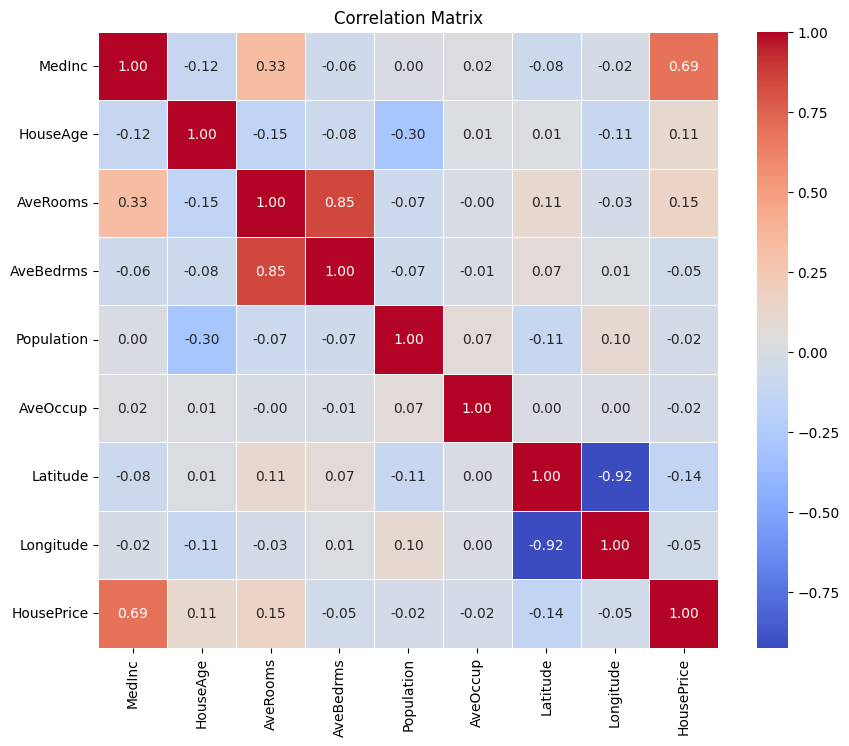

In [ ]:
corr = housing_df.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
corr["HousePrice"].abs().sort_values(ascending=False)

,HousePrice
HousePrice,1.000000
MedInc,0.688075
AveRooms,0.151948
Latitude,0.144160
HouseAge,0.105623
AveBedrms,0.046701
Longitude,0.045967
Population,0.024650
AveOccup,0.023737




---


### 🔹 Step 7: Scatter Plot for Key Feature


---



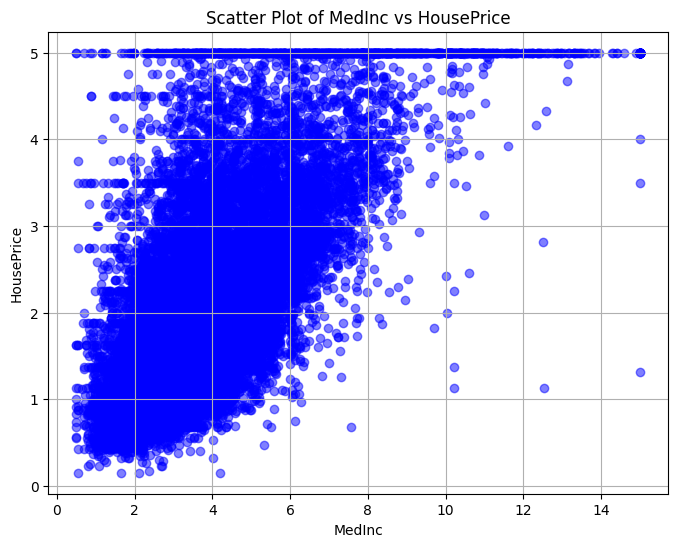

In [ ]:
medinc = housing_df['MedInc']
houseprice = housing_df['HousePrice']

plt.figure(figsize=(8,6))
plt.scatter(medinc, houseprice, alpha=0.5, color='blue')
plt.title('Scatter Plot of MedInc vs HousePrice')
plt.xlabel('MedInc')
plt.ylabel('HousePrice')
plt.grid(True)
plt.show()



---

### 🔹 Step 8: Multicollinearity Check (VIF)


---



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

housing_df_vif = housing_df.drop('HousePrice', axis=1)
housing_df_vif = housing_df_vif.apply(pd.to_numeric, errors='coerce')

vif_data = pd.DataFrame()
vif_data["Feature"] = housing_df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(housing_df_vif.values, i) for i in range(len(housing_df_vif.columns))]
print(vif_data)

      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [ ]:
housing_df = housing_df.drop(['Latitude', 'Longitude'], axis=1)



---


**✅ Checked VIF values — high VIF indicates multicollinearity. Dropped Latitude and Longitude as they caused redundancy.**


---



### 🔹 Step 9: Building the Linear Regression Model


---



In [ ]:
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
housing_df[cols_to_convert] = housing_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
housing_df['HousePrice'] = pd.to_numeric(housing_df['HousePrice'], errors='coerce')

X = sm.add_constant(housing_df.drop('HousePrice', axis=1))
y = housing_df['HousePrice']

model = sm.OLS(y, X).fit()



---
**✅ Built regression model with statsmodels OLS.**


---






---
### 🔹 Step 10: Residual Analysis


---




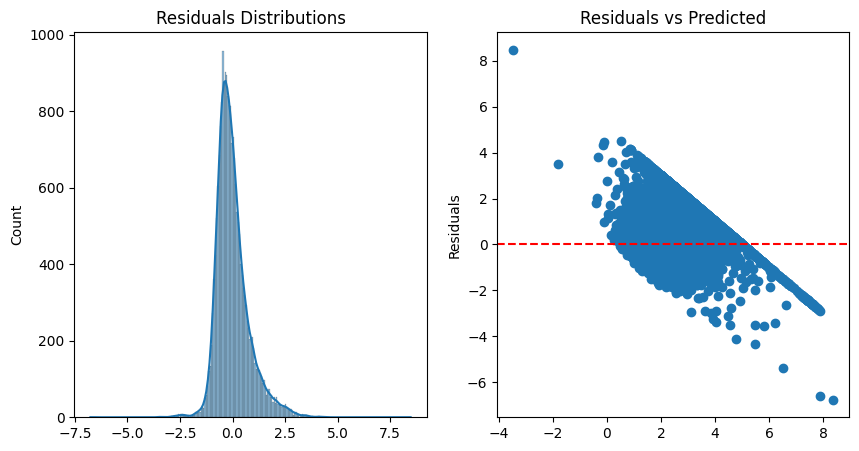

Model coefficients:
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [ ]:
residuals = model.resid

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distributions')

plt.subplot(1, 2, 2)
plt.scatter(model.predict(), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.ylabel('Residuals')
plt.show()

print("Model coefficients:\n", model.params)



---

**📊 Residuals are centered around zero, good sign for model validity.**


---





---

### 🔹 Step 11: Model Evaluation


---



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X)

print("R square Score:", r2_score(y, predictions))
print("MSE:", mean_squared_error(y, predictions))

R square Score: 0.5396977345638283
MSE: 0.6129156196698703




---

**✅ Model performance before handling outliers.**


---



### 🔹 Step 12: Outlier Detection (Boxplots)


---



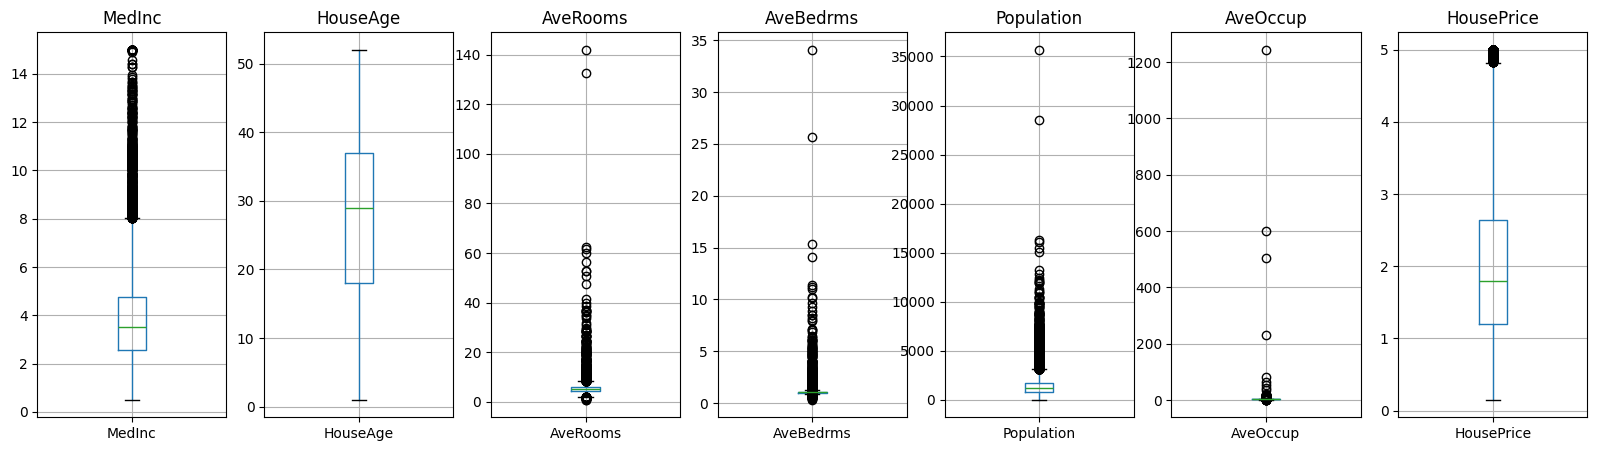

In [ ]:
import matplotlib.pyplot as plt

def plot_boxplots(df):

  fig, axes = plt.subplots(1, len(df.columns), figsize=(20, 5))

  for i, column_name in enumerate(df.columns):

    df.boxplot(column=column_name, ax=axes[i])
    axes[i].set_title(column_name)

  plt.show()

plot_boxplots(housing_df)



---

**📊 Some variables have extreme values (outliers).**


---



### 🔹 Step 13: Outlier Treatment (IQR Method)


---



In [ ]:
def remove_outliers(df):
    df_no_outliers = df.copy()

    for column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_no_outliers[column_name] = df_no_outliers[column_name].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )

    return df_no_outliers

In [ ]:
housing_df_new = remove_outliers(housing_df)

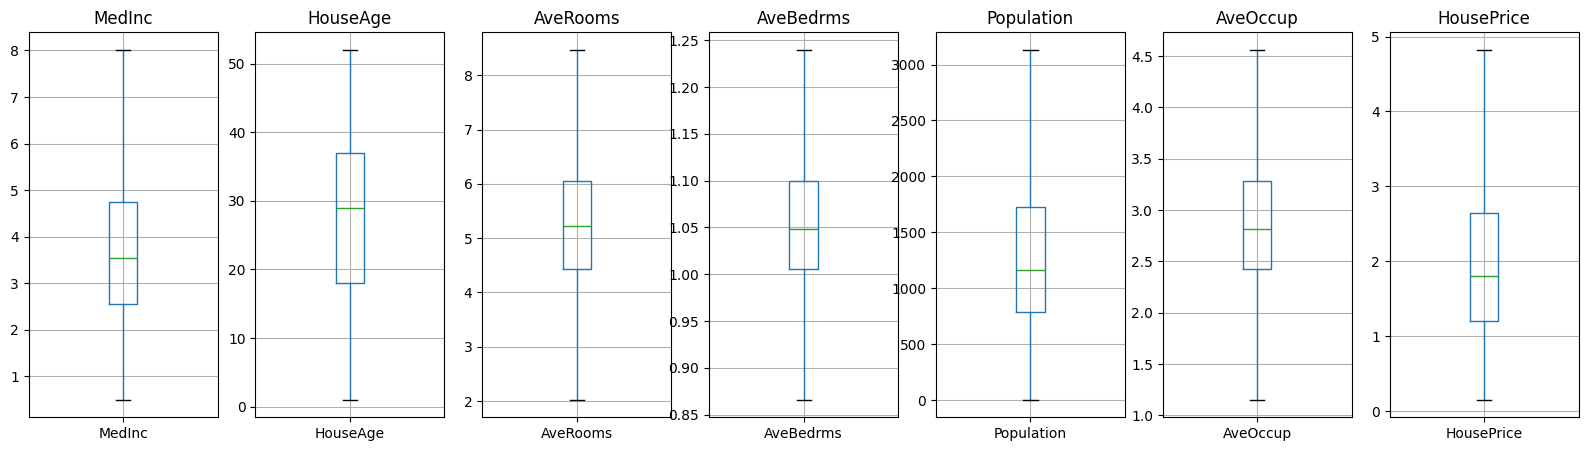

In [ ]:
plot_boxplots(housing_df_new)



---

**✅ Replaced outliers using IQR method (winsorization).**


---



### 🔹 Step 14: Rebuilding Model After Outlier Treatment


---



In [ ]:
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
housing_df_new[cols_to_convert] = housing_df_new[cols_to_convert].apply(pd.to_numeric, errors='coerce')
housing_df_new['HousePrice'] = pd.to_numeric(housing_df_new['HousePrice'], errors='coerce')

X = sm.add_constant(housing_df_new.drop('HousePrice', axis=1))
y = housing_df_new['HousePrice']

model = sm.OLS(y, X).fit()

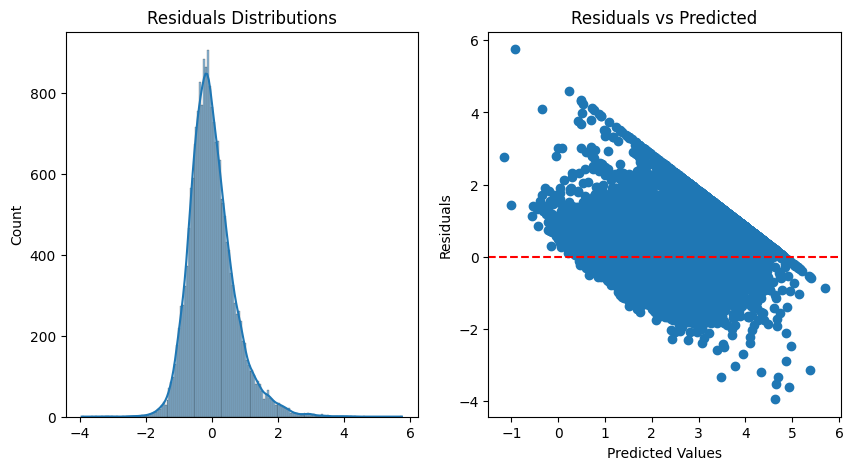

Model coefficients:
 const        -1.025744
MedInc        0.634138
HouseAge      0.018696
AveRooms     -0.258632
AveBedrms     2.308808
Population    0.000079
AveOccup     -0.357348
dtype: float64


In [ ]:
residuals = model.resid

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distributions')

plt.subplot(1, 2, 2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

print("Model coefficients:\n", model.params)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X)

print("R square Score:", r2_score(y, predictions))
print("MSE:", mean_squared_error(y, predictions))

R square Score: 0.617696810976802
MSE: 0.49001892235770017




---
**Final Notes:**

* Median Income (MedInc) is the strongest predictor of California housing prices.

* Outlier treatment stabilized the model and improved residuals.

* Linear regression gives a good baseline, but more advanced models (Random Forest, Gradient Boosting) may capture non-linear relationships better.


---


